In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Pokemon.csv')

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


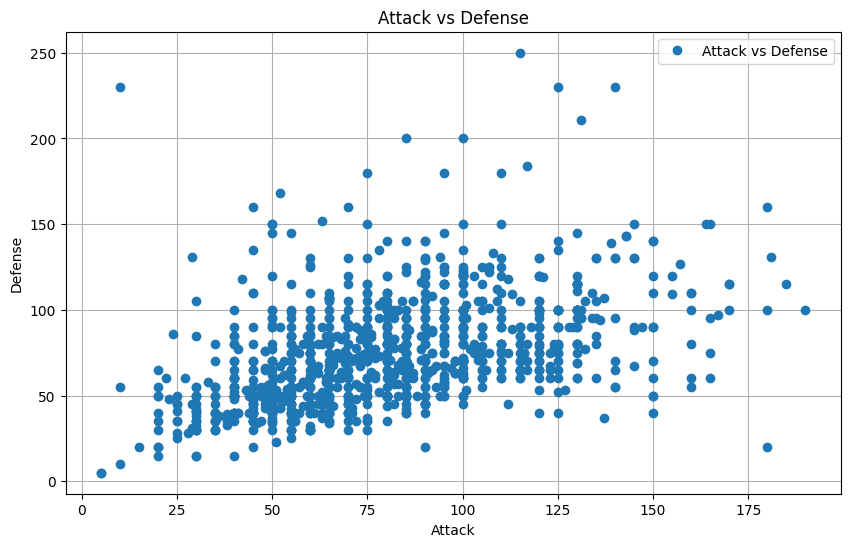

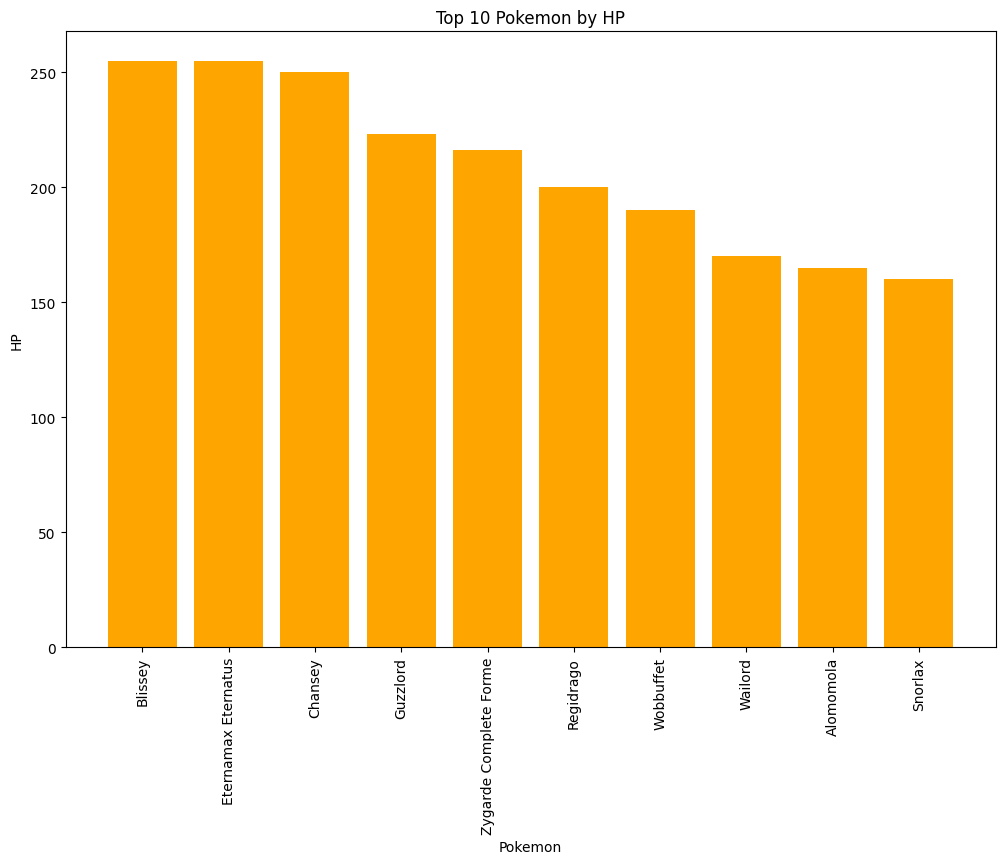

In [6]:
import matplotlib.pyplot as plt
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['attack'], df['defense'], 'o', label='Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense')
plt.legend()
plt.grid(True)
plt.show()

# Bar Plot (misalnya, total HP of top 10 Pokemon)
top_10_pokemon = df.nlargest(10, 'hp')
plt.figure(figsize=(12, 8))
plt.bar(top_10_pokemon['name'], top_10_pokemon['hp'], color='orange')
plt.xlabel('Pokemon')
plt.ylabel('HP')
plt.title('Top 10 Pokemon by HP')
plt.xticks(rotation=90)
plt.show()

C:\Users\hafiz\AppData\Local\Temp\ipykernel_14688\359087097.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Element', y='Number of Pokémon', data=type_counts, palette='viridis')


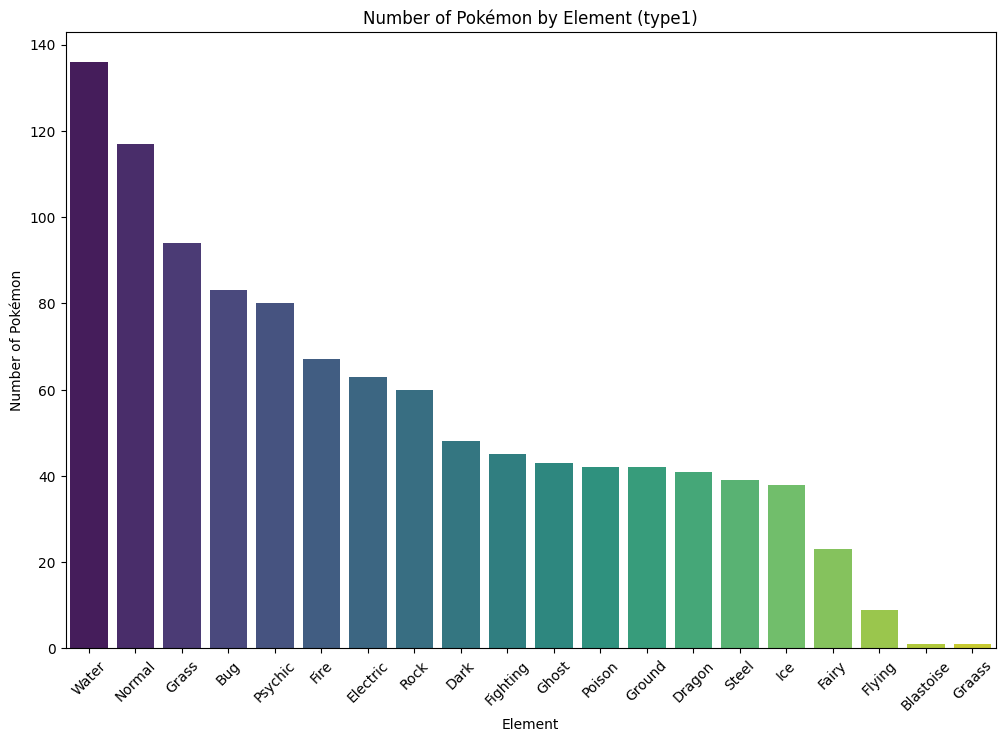

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data
df = pd.read_csv('Pokemon.csv')

# Hitung jumlah Pokémon per elemen
type_counts = df['type1'].value_counts().reset_index()
type_counts.columns = ['Element', 'Number of Pokémon']

# Plot Bar dengan Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Element', y='Number of Pokémon', data=type_counts, palette='viridis')
plt.xlabel('Element')
plt.ylabel('Number of Pokémon')
plt.title('Number of Pokémon by Element (type1)')
plt.xticks(rotation=45)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [9]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [10]:
df.isna().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [12]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [13]:
print(df.shape)

(1072, 13)


In [14]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

In [15]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

#Fit the imputer on the dataset and transform it to fill missing values
imp_data = imputer.fit_transform(numerical_cols)

# Convert the result back to a DataFrame
df_imp = pd.DataFrame(imp_data, columns=numerical_cols.columns)

In [16]:
df_final = pd.concat([df_imp, categorical_cols], axis=1)

In [17]:
df_final.head()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,name,type1,type2
0,1.0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,Bulbasaur,Grass,Poison
1,2.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,Ivysaur,Grass,Poison
2,3.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,Venusaur,Grass,Poison
3,3.0,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,Mega Venusaur,Grass,Poison
4,3.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,Gigantamax Venusaur,Grass,Poison


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number      1072 non-null   float64
 1   total       1072 non-null   float64
 2   hp          1072 non-null   float64
 3   attack      1072 non-null   float64
 4   defense     1072 non-null   float64
 5   sp_attack   1072 non-null   float64
 6   sp_defense  1072 non-null   float64
 7   speed       1072 non-null   float64
 8   generation  1072 non-null   float64
 9   name        1072 non-null   object 
 10  type1       1072 non-null   object 
 11  type2       574 non-null    object 
dtypes: float64(9), object(3)
memory usage: 100.6+ KB


In [19]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['name'] = label_encoder.fit_transform(df['name'])
df_final['type1'] = label_encoder.fit_transform(df['type1'])
df_final['type2'] = label_encoder.fit_transform(df['type2'])
df_final['legendary'] = label_encoder.fit_transform(df['legendary'])

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number      1072 non-null   float64
 1   total       1072 non-null   float64
 2   hp          1072 non-null   float64
 3   attack      1072 non-null   float64
 4   defense     1072 non-null   float64
 5   sp_attack   1072 non-null   float64
 6   sp_defense  1072 non-null   float64
 7   speed       1072 non-null   float64
 8   generation  1072 non-null   float64
 9   name        1072 non-null   int32  
 10  type1       1072 non-null   int32  
 11  type2       1072 non-null   int32  
 12  legendary   1072 non-null   int64  
dtypes: float64(9), int32(3), int64(1)
memory usage: 96.4 KB


In [21]:
df_select = df_final[['total',
                      'hp',
                      'attack',
                      'defense',
                      'sp_attack',
                      'sp_defense',
                      'speed',
                      'generation',
                      'legendary'
]]

In [22]:
# Separate
train_df = df_select.iloc[:964,:]
test_df = df_select.iloc[964:,:8]

In [23]:
x = train_df.drop('legendary', axis=1)
y = train_df['legendary'].astype('category').cat.codes

In [24]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [26]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("\n")


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       171
           1       0.90      0.82      0.86        22

    accuracy                           0.97       193
   macro avg       0.94      0.90      0.92       193
weighted avg       0.97      0.97      0.97       193





Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       171
           1       0.88      0.64      0.74        22

    accuracy                           0.95       193
   macro avg       0.91      0.81      0.85       193
weighted avg       0.95      0.95      0.94       193





c:\Users\hafiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: SVM
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.94      0.77      0.85        22

    accuracy                           0.97       193
   macro avg       0.96      0.88      0.92       193
weighted avg       0.97      0.97      0.97       193



Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       171
           1       0.95      0.86      0.90        22

    accuracy                           0.98       193
   macro avg       0.97      0.93      0.95       193
weighted avg       0.98      0.98      0.98       193



Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       171
           1       0.88      0.95      0.91        22

    accuracy                           0.98       193
   macro avg       0.93      0.97      0.95       193
weighted avg 

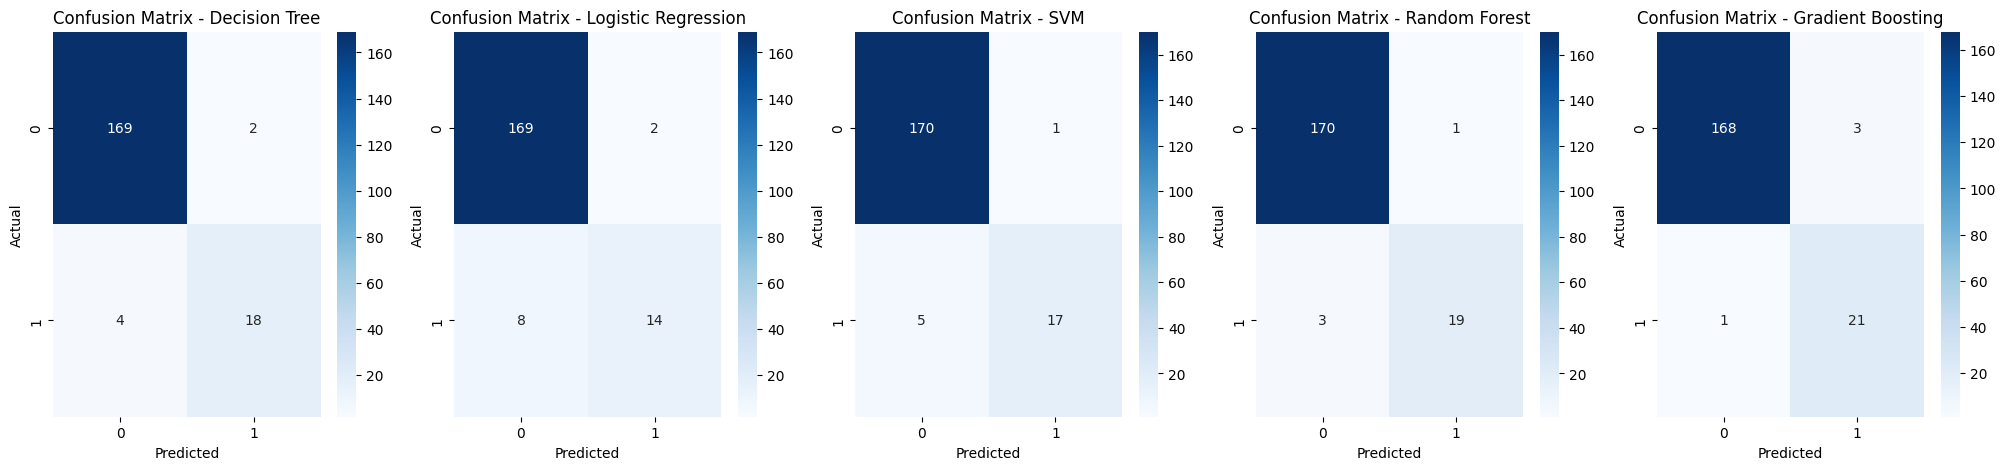

In [27]:
# Confusion Matrices
cm_dt = confusion_matrix(y_test, predictions['Decision Tree'])
cm_lg = confusion_matrix(y_test, predictions['Logistic Regression'])
cm_svc = confusion_matrix(y_test, predictions['SVM'])
cm_rf = confusion_matrix(y_test, predictions['Random Forest'])
cm_gb = confusion_matrix(y_test, predictions['Gradient Boosting'])

# Plot confusion matrices
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix - Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_lg, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Confusion Matrix - Logistic Regression')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(cm_svc, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Confusion Matrix - SVM')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax[3], cmap='Blues')
ax[3].set_title('Confusion Matrix - Random Forest')
ax[3].set_xlabel('Predicted')
ax[3].set_ylabel('Actual')

sns.heatmap(cm_gb, annot=True, fmt='d', ax=ax[4], cmap='Blues')
ax[4].set_title('Confusion Matrix - Gradient Boosting')
ax[4].set_xlabel('Predicted')
ax[4].set_ylabel('Actual')

plt.show()

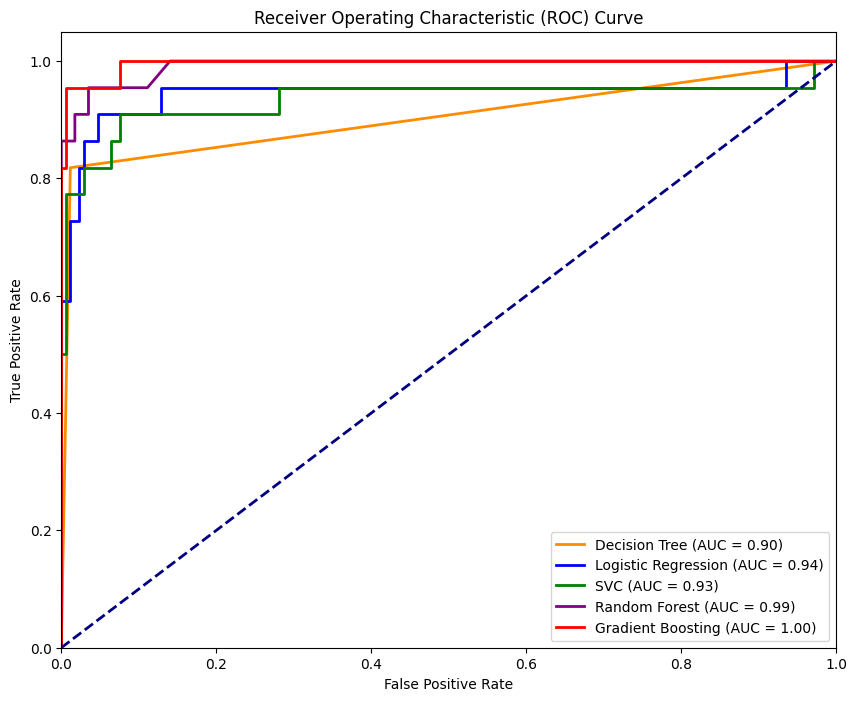

In [29]:
# ROC Curves
plt.figure(figsize=(10, 8))

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, models['Decision Tree'].predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, models['Logistic Regression'].predict_proba(X_test)[:,1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')

# SVM
fpr_svc, tpr_svc, _ = roc_curve(y_test, models['SVM'].predict_proba(X_test)[:,1])
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, models['Random Forest'].predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, models['Gradient Boosting'].predict_proba(X_test)[:,1])
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


MODEL 1

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVC model
svc = SVC(random_state=42, probability=True)

# Perform GridSearchCV
grid_search_svc = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
grid_search_svc.fit(X_train, y_train)

# Get the best parameters and the best model
best_svc_model = grid_search_svc.best_estimator_
print(f"Best Parameters: {grid_search_svc.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, ke

In [32]:
# Cross-validation with the best model
cv_scores = cross_val_score(best_svc_model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.92227979 0.93782383 0.92227979 0.96891192 0.86979167]
Mean Cross-Validation Score: 0.9242174006908463


In [33]:
# Train the best SVC model on the full training set
best_svc_model.fit(X_train, y_train)

# Predict and evaluate the best SVC model
y_pred_best_svc = best_svc_model.predict(X_test)
print("Best SVC Model:\n", classification_report(y_test, y_pred_best_svc))
# Confusion Matrix for the best SVC model
cm_best_svc = confusion_matrix(y_test, y_pred_best_svc)

Best SVC Model:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.94      0.77      0.85        22

    accuracy                           0.97       193
   macro avg       0.96      0.88      0.92       193
weighted avg       0.97      0.97      0.97       193



In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Misalkan Anda memiliki DataFrame `df` dengan fitur-fitur yang perlu dinormalisasi
scaler = StandardScaler()

In [36]:
import numpy as np

input_data = (440, 70, 55, 65,  95, 85, 70,3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


prediction = best_svc_model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('Bukan Pokemon Lagendary')
else:
    print('Pokemon Legendary')

[0]
Bukan Pokemon Lagendary


c:\Users\hafiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [37]:
import pickle

In [38]:
filename = 'Pokemon_model.sav'
pickle.dump(best_svc_model,open(filename,'wb'))

In [ ]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
